# Escalamiento de Datos numéricos
Se realizará la transformación lineal y no lineal de algunas variables.

## Transformación lineal

Se realizará la transformación por los metodos max_min y zscore

In [1]:
#se importan las librerias requeridas.

import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Se importa los datasets de la libreria scikit-learn
## para instalar la libreria 
## conda install -c conda-forge scikit-learn

from sklearn import datasets, linear_model
X, y =datasets.load_diabetes(return_X_y=True)
raw=X[:, None, 2]

In [5]:
# Reglas de escalamiento:

max_raw= max(raw)
min_raw=min(raw)
transformacion_lineal_max_min = (2*raw-min_raw-max_raw)/(max_raw-min_raw)

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

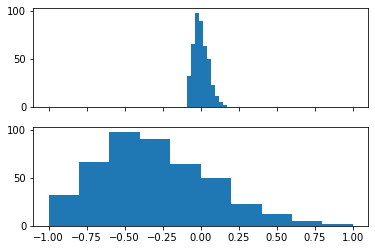

In [11]:
#distribución de los datos originales y escalados, compartiendo el eje X

fig, axs = plt.subplots(2,1, sharex = True, sharey = True)
axs[0].hist(raw)
axs[1].hist(transformacion_lineal_max_min)

In [12]:
# modelos para entrenamiento

def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_escalada():
    linear_model.LinearRegression().fit(transformacion_lineal_max_min, y)

In [14]:
raw_time=timeit.timeit(train_raw, number= 100)
scaled_time=timeit.timeit(train_escalada, number= 100)
print("Tiempo de entrenamiento de los datos crudos: {}".format(raw_time))
print("Tiempo de entrenamiento de los datos escalados: {}".format(scaled_time))


Tiempo de entrenamiento de los datos crudos: 0.09864389999984269
Tiempo de entrenamiento de los datos escalados: 0.07135490000018763


Con el analisis del tiempo de entrenamiento del modelo de regresión lineal para los datos crudos `RAW`, se evidencia que se genera una optimización del tiempo de ejecución cuando se escalan los datos.  

# Ejercicio: 

Realizar el calculo del tiempo de entrenamiento pero realizando la transformación lineal `zscore` 

Tiempo de entrenamiento de los datos crudos: 0.09864389999984269
Tiempo de entrenamiento de los datos escalados: 0.05012059999990015


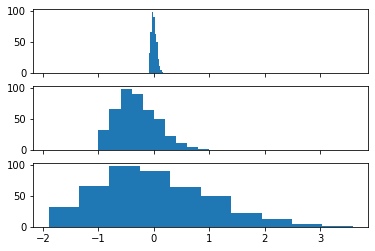

In [16]:
media=raw.mean()
std=raw.std()
zscore=(raw-media)/std

fig, axs = plt.subplots(3,1, sharex = True, sharey = True)
axs[0].hist(raw)
axs[1].hist(transformacion_lineal_max_min)
axs[2].hist(zscore)

def train_zscore():
    linear_model.LinearRegression().fit(zscore, y)

raw_time2=timeit.timeit(train_raw, number= 100)
zscore_time=timeit.timeit(train_zscore, number= 100)
print("Tiempo de entrenamiento de los datos crudos: {}".format(raw_time))
print("Tiempo de entrenamiento de los datos escalados: {}".format(zscore_time))

## Transformación no lineal

Se realizará la transformación con la tangente hiperbolica.

<AxesSubplot:>

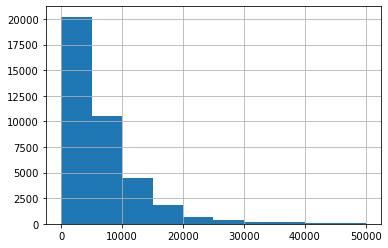

In [17]:
df = pd.read_csv("./notas/cars.csv")
df.price_usd.hist()


<AxesSubplot:>

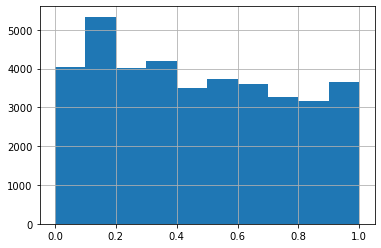

In [18]:
p=10000
tanh=df.price_usd.apply(lambda x: np.tanh(x/p))
tanh.hist()
